In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from src.utils import switch_quotes, save_figure

# Read data

In [148]:
colors = ["#1f77b4", "#ff7f0e", "#2ca02c","#d62728", "#9467bd"]
data = pd.read_csv("tuning_r1.csv")


data['params'] = data['params'].apply(lambda x: json.loads(switch_quotes(x)))
params = data['params'][0].keys()
datasets = sorted(data['Dataset'].unique())
data = pd.concat([data.drop(['params'], axis=1), data['params'].apply(pd.Series)], axis=1)

# Models

In [149]:
rank_by = 'RMSE test'

param_titles = {'min_epochs': 'Minimum number of epochs before early stopping', 'learning_rate': 'Learning rate AdamW', 
                'dropout': 'Dropout', 'l2_penalty': 'L2 penalty', 'init_stride': 'Initial CNN', 'depth': 'Depth'}

order_by = list(param_titles.keys())

results = data[['Dataset'] + order_by + [rank_by]]
models = results[order_by].sort_values(by=order_by).drop_duplicates().reset_index()
models['index'] = [f'Model {i}' for i in range(len(models))]
to_cd = results.merge(models, on=order_by).rename(columns={'index': 'Model'}).to_csv("intermediate_tuning_results.csv", index=False)
models = models.rename(columns={'index': 'Model'}).rename(columns=param_titles)
models['Initial CNN'] = models['Initial CNN'].apply(lambda x: 'With' if x==2 else 'Without')
num_models = len(models)

models.to_csv("model_overview.csv", index=False)


In [150]:
to_cd

# Parameter overview

In [151]:
param_overview = {}
for i, param in enumerate(models.columns[1:]):
    param_overview[param] = str(models[param].unique())
param_overview = pd.DataFrame(param_overview, index=[0]).T.reset_index().rename(columns={0: 'Values', 'index': 'Parameter'})
param_overview.to_csv("tables/tuning_param_overview.csv", index=False)
param_overview


,Parameter,Values
0,Minimum number of epochs before early stopping,[ 50 800]
1,Learning rate AdamW,[1.e-05 1.e-04 1.e-03]
2,Dropout,[0. 0.3]
3,L2 penalty,[0. 0.001]
4,Initial CNN,['Without' 'With']
5,Depth,[6]


In [152]:
models
models.to_csv("model_overview.csv", index=False)


# Ranking

In [153]:
ranked = []
to_show = []
for grp_idx, grp in results.groupby('Dataset'):
    # sort
    grp = grp.sort_values(rank_by, ascending=rank_by!='R2 test')
    # add rank
    grp['Rank'] = range(1, len(grp) + 1)

    ranked.append(grp)
    # keep first three
    to_show.append(grp.iloc[:3])

ranked = pd.concat(ranked)
to_show = pd.concat(to_show)

to_show.groupby(['Dataset', 'Rank']).first() # because of ranking, there is just one line per group --> can do first


min_epochs  learning_rate  dropout  l2_penalty  \
Dataset      Rank                                                   
DS_-10_10_10 1             50        0.00010      0.3       0.000   
             2            800        0.00100      0.0       0.001   
             3            800        0.00100      0.3       0.001   
DS_-10_80_10 1             50        0.00010      0.3       0.001   
             2            800        0.00100      0.0       0.001   
             3            800        0.00100      0.0       0.000   
DS_0_10_10   1            800        0.00100      0.0       0.000   
             2            800        0.00100      0.0       0.001   
             3             50        0.00010      0.3       0.001   
DS_0_80_10   1             50        0.00010      0.3       0.000   
             2             50        0.00010      0.0       0.001   
             3            800        0.00001      0.0       0.000   
DS_10_10_10  1             50        0.00010      0.3       0.000   
             2             50        0.00010      0.3       0.001   
             3            800        0.00100      0.0       0.000   
DS_10_80_10  1            800        0.00100      0.3       0.001   
             2             50        0.00010      0.3       0.000   
             3             50        0.00010      0.3       0.001   
DS_20_10_10  1             50        0.00010      0.0       0.001   
             2            800        0.00100      0.0       0.000   
             3             50        0.00010      0.0       0.000   
DS_20_80_10  1            800        0.00010      0.0       0.001   
             2             50        0.00010      0.3       0.001   
             3            800        0.00100      0.0       0.001   
DS_50_10_10  1            800        0.00010      0.0       0.001   
             2            800        0.00010      0.0       0.000   
             3            800        0.00100      0.0       0.001   
DS_50_80_10  1            800        0.00100      0.0       0.000   
             2             50        0.00100      0.0       0.001   
             3            800        0.00100      0.0       0.001   
DS_80_10_10  1            800        0.00100      0.0       0.001   
             2            800        0.00100      0.0       0.000   
             3            800        0.00010      0.0       0.001   
DS_80_80_10  1            800        0.00010      0.0       0.001   
             2            800        0.00010      0.0       0.000   
             3            800        0.00100      0.0       0.000   

                   init_stride  depth  RMSE test  
Dataset      Rank                                 
DS_-10_10_10 1              -1      6  10.773037  
             2              -1      6  10.811065  
             3              -1      6  10.908423  
DS_-10_80_10 1              -1      6  10.735251  
             2              -1      6  10.869665  
             3              -1      6  10.947259  
DS_0_10_10   1               2      6  10.708455  
             2              -1      6  10.910561  
             3              -1      6  10.998718  
DS_0_80_10   1              -1      6  10.915551  
             2              -1      6  10.991591  
             3               2      6  11.034562  
DS_10_10_10  1              -1      6  10.550848  
             2              -1      6  10.594497  
             3               2      6  10.759600  
DS_10_80_10  1               2      6  10.589589  
             2               2      6  10.728700  
             3              -1      6  10.803152  
DS_20_10_10  1               2      6   9.977595  
             2               2      6  10.082017  
             3              -1      6  10.279555  
DS_20_80_10  1               2      6   9.775178  
             2               2      6   9.910451  
             3              -1      6   9.959300  
DS_50_10_10  1              -1      6   8.458129  
             2     

In [154]:
ranked.pivot_table(index='Dataset', columns='Rank', values=rank_by)

Rank,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
Dataset,,,,,,,,,,,,,,,,,,,,,
DS_-10_10_10,10.773037,10.811065,10.908423,10.947729,10.958147,10.964118,11.060166,11.072045,11.080412,11.159357,...,20.898975,21.367357,21.520325,21.774317,22.627132,24.239058,30.943406,32.132524,33.901664,36.611231
DS_-10_80_10,10.735251,10.869665,10.947259,11.018736,11.067074,11.119249,11.163825,11.219045,11.340550,11.341766,...,16.030497,16.412415,17.147190,17.275073,20.455582,22.945374,26.203183,30.534952,32.080080,34.615409
DS_0_10_10,10.708455,10.910561,10.998718,11.078684,11.133594,11.162555,11.162801,11.259626,11.262507,11.371693,...,18.522869,19.257747,21.743292,23.196429,24.105627,27.859009,29.255462,30.046290,33.019074,36.568126
DS_0_80_10,10.915551,10.991591,11.034562,11.035605,11.047166,11.099644,11.197246,11.209506,11.218530,11.233628,...,22.541129,22.706207,23.424790,24.627642,27.035864,33.860420,34.317358,35.949408,46.552057,55.690974
DS_10_10_10,10.550848,10.594497,10.759600,10.834000,10.859944,10.974459,11.007151,11.024566,11.060731,11.275687,...,14.754217,14.800170,15.119840,15.751728,16.004323,16.829107,19.830933,25.410603,28.695086,29.058465
DS_10_80_10,10.589589,10.728700,10.803152,10.841971,10.842748,10.883192,10.897747,10.941219,10.950366,10.979092,...,23.522699,24.199295,25.258948,25.727315,25.903087,28.133964,29.803915,30.107055,34.974043,35.385594
DS_20_10_10,9.977595,10.082017,10.279555,10.426601,10.429649,10.488990,10.529718,10.582580,10.625472,10.851032,...,13.951984,13.960997,14.542968,15.274491,16.030395,18.109134,18.871206,20.188704,22.944496,22.974627
DS_20_80_10,9.775178,9.910451,9.959300,10.242889,10.272593,10.424631,10.532773,10.657328,10.686842,10.704150,...,18.410623,20.329137,26.679028,27.303876,30.801471,32.982891,33.312460,36.014905,38.056983,52.888377
DS_50_10_10,8.458129,8.464654,8.609703,8.854806,8.948839,9.504587,9.816739,9.865572,9.877464,9.893734,...,13.349786,13.700431,15.461011,15.835004,16.514949,22.598470,24.377186,29.787023,32.186087,36.776681


In [155]:
# the whole ranking

ranked.groupby(['Dataset', 'Rank']).first()

min_epochs  learning_rate  dropout  l2_penalty  \
Dataset      Rank                                                   
DS_-10_10_10 1             50        0.00010      0.3       0.000   
             2            800        0.00100      0.0       0.001   
             3            800        0.00100      0.3       0.001   
             4            800        0.00100      0.0       0.000   
             5            800        0.00100      0.0       0.001   
...                       ...            ...      ...         ...   
DS_80_80_10  44            50        0.00100      0.3       0.000   
             45            50        0.00001      0.0       0.001   
             46            50        0.00001      0.0       0.000   
             47            50        0.00100      0.0       0.000   
             48            50        0.00100      0.0       0.001   

                   init_stride  depth  RMSE test  
Dataset      Rank                                 
DS_-10_10_10 1              -1      6  10.773037  
             2              -1      6  10.811065  
             3              -1      6  10.908423  
             4              -1      6  10.947729  
             5               2      6  10.958147  
...                        ...    ...        ...  
DS_80_80_10  44              2      6  29.739130  
             45              2      6  30.125704  
             46              2      6  35.656593  
             47              2      6  87.438441  
             48              2      6  90.096380  

[576 rows x 7 columns]

# Pairwise-wilcoxons signed-rank test
1. performed on ranks
2. using the holm-correction when forming groups


/tmp/ipykernel_6409/2538490362.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('magma_r', num_models)    # 11 discrete colors


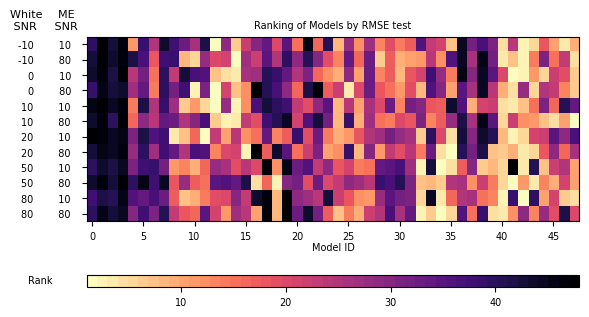

,White SNR,ME SNR,Mean,Std,Min,Max,% below 48
0,-10,10,24.5,14.0,1.0,48.0,0.98
1,-10,80,24.5,14.0,1.0,48.0,0.98
2,0,10,24.5,14.0,1.0,48.0,0.98
3,0,80,24.5,14.0,1.0,48.0,0.98
4,10,10,24.5,14.0,1.0,48.0,0.98
5,10,80,24.5,14.0,1.0,48.0,0.98
6,20,10,24.5,14.0,1.0,48.0,0.98
7,20,80,24.5,14.0,1.0,48.0,0.98
8,50,10,24.5,14.0,1.0,48.0,0.98
9,50,80,24.5,14.0,1.0,48.0,0.98


In [156]:
performance_data = {}

#color_by = 'Rank' # either "Rank" or rank_by
color_by = 'Rank'

for idx, grp in ranked.groupby(['Dataset']):
    grp_sorted = grp.sort_values(by=order_by) 
    performance_data[idx[0]] = grp_sorted[color_by].values

plt.figure(figsize=(10, 5))
performance_data = pd.DataFrame(performance_data) # model id x dataset name
if color_by == 'Rank':
    cmap = plt.cm.get_cmap('magma_r', num_models)    # 11 discrete colors
elif color_by == 'R2 test':
    cmap = plt.cm.get_cmap('magma')
else:
    cmap = plt.cm.get_cmap('magma_r')
limits = {'Rank': num_models, 'MAPE test': 1, 'RMSE test': 8.37, 'R2 test': 0}
limit = limits[color_by]
if color_by != 'R2 test':
    im = plt.imshow(performance_data.T, cmap=cmap, aspect=1.5, vmax=limit)
else:
    im = plt.imshow(performance_data.T, cmap=cmap, aspect=1.5, vmin=limit)

cbar = plt.colorbar(orientation='horizontal', aspect=40)
cbar.set_label(loc='left', label=color_by)
cbar.ax.xaxis.set_label_coords(-0.12, 1)

if color_by != 'R2 test':
    cbar.ax.invert_yaxis()

plt.title(f'Ranking of Models by {rank_by}')
plt.text(-8, -1, f'White \n SNR', fontsize=8)
plt.text(-4, -1, f'  ME\n SNR', fontsize=8)
plt.yticks(range(len(performance_data.columns)), [f"{x.split('_')[1]}        {x.split('_')[2]}  " for x in performance_data.columns])
plt.xticks(np.arange(0, 47, 5), np.arange(0, 47, 5))
plt.xlabel('Model ID')
plt.tight_layout()
plt.gcf().set_size_inches(5.5, 4)
plt.savefig(f'figures/tune_ranking_{rank_by.replace(" ", "_")}.pdf', bbox_inches='tight')
plt.show()

performance_data = pd.concat((performance_data, 
                              grp_sorted.reset_index()[order_by]), 
                              axis=1)

stats = performance_data[datasets].describe().loc[['mean', 'std', 'min', 'max']]
def f(x, metric): 
    if metric == 'R2 test':
        return (x > limits[metric]).mean()
    return (x < limits[metric]).mean()

stats.loc[f'% {"below" if color_by!="R2 test" else "above"} {limit}'] = performance_data[datasets].apply(lambda x: f(x, color_by))
stats = stats.T.reset_index().rename(columns={'index': 'Dataset'})
stats['White SNR'] = stats['Dataset'].apply(lambda x: x.split('_')[1])
stats['ME SNR'] = stats['Dataset'].apply(lambda x: x.split('_')[2])
stats.drop('Dataset', axis=1, inplace=True)
stats = stats.round(2)
# reorder so that the last two columns is first
stats = stats[['White SNR', 'ME SNR', 'mean', 'std', 'min', 'max', f'% {"below" if color_by!="R2 test" else "above"} {limit}']]
stats = stats.rename(columns={'mean': 'Mean', 'std': 'Std', 'min': 'Min', 'max': 'Max'})
stats.to_csv(f"tables/statistics_{color_by}_.csv", index=False)
stats

In [157]:
# which dataset makes the cut?
# number of models below/above limit for each dataset
(performance_data[datasets] < limit).mean()

DS_-10_10_10    0.979167
DS_-10_80_10    0.979167
DS_0_10_10      0.979167
DS_0_80_10      0.979167
DS_10_10_10     0.979167
DS_10_80_10     0.979167
DS_20_10_10     0.979167
DS_20_80_10     0.979167
DS_50_10_10     0.979167
DS_50_80_10     0.979167
DS_80_10_10     0.979167
DS_80_80_10     0.979167
dtype: float64

In [217]:
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests
#from multipy.fdr import qvalue #broken
# compare models with wilcoxon
alpha = 0.05

p_values = []

for i in range(num_models):
    for j in range(num_models):
        #print(f"Comparing model {i} with model {j}")
        if i == j:
            p_values.append(0)
            continue
        res = wilcoxon(performance_data[datasets].loc[i], 
                       performance_data[datasets].loc[j], 
                       method='exact')
        p_values.append(res.pvalue) # if p low enough there is a difference. if the p is higer than alpha, there is no significant difference
adjusted_p_values = p_values # no correction
#adjusted_p_values = multipletests(p_values, alpha=0.1)[1] # we have so many models, that the correction is extremely strict. 
#adjusted_p_values = qvalue(p_values, threshold=alpha)[1] # fdr set to alpha

#print(adjusted_p_values[1])

# Create a matrix of indistinguishable models with adjusted p_values
indistinguishable_matrix = np.zeros((num_models, num_models))
for i in range(num_models):
    for j in range(num_models):
        if i != j:
        # null hypothesis is that the models are the same
        # alternative is that the models are different
        # if the p_value is low enough, we reject the null hypothesis, thus the models are different
            indistinguishable_matrix[i, j] = adjusted_p_values[i*num_models+j] > alpha
pd.DataFrame(indistinguishable_matrix).astype(int)

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,1,...,1,1,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,1,1,...,1,1,0,0,0,0,1,0,1,0
7,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,1,0,0,1,...,0,1,0,1,0,1,1,1,1,1
9,0,0,0,0,1,0,1,0,1,0,...,0,1,0,1,0,1,1,1,1,1


# Average Ranking

In [218]:


# average rank for model per dataset

average_ranking = ranked.groupby(order_by).agg({'Rank': 'mean'}).reset_index().sort_values(by='Rank')
average_ranking


,min_epochs,learning_rate,dropout,l2_penalty,init_stride,depth,Rank
40,800,0.00100,0.0,0.000,-1,6,6.166667
42,800,0.00100,0.0,0.001,-1,6,8.750000
24,800,0.00001,0.0,0.000,-1,6,13.250000
34,800,0.00010,0.0,0.001,-1,6,13.333333
26,800,0.00001,0.0,0.001,-1,6,13.750000
47,800,0.00100,0.3,0.001,2,6,13.916667
41,800,0.00100,0.0,0.000,2,6,14.333333
32,800,0.00010,0.0,0.000,-1,6,14.416667
12,50,0.00010,0.3,0.000,-1,6,14.583333
14,50,0.00010,0.3,0.001,-1,6,14.750000


In [221]:
top_models = [40, 42, 26, 24]
for i in range(num_models):
    for j in range(num_models):
        for k in top_models:
            if i == k and k!=j and j in top_models and p_values[i*num_models+j] < alpha:
                print(f"Model {i} and model {j} are significantly different with p-value {adjusted_p_values[i*num_models+j]}")

Model 24 and model 40 are significantly different with p-value 0.01220703125
Model 26 and model 40 are significantly different with p-value 0.01220703125
Model 40 and model 24 are significantly different with p-value 0.01220703125
Model 40 and model 26 are significantly different with p-value 0.01220703125


In [196]:
# 0.05 = num_false discoveries / num_tests
num_tests = (num_models*(num_models-1) / 2)
num_false_discoveries = alpha * num_tests
print(f"With FDR rate of {alpha}, we expect {round(num_false_discoveries, 2)} false discoveries in {int(num_tests)} tests")

With FDR rate of 0.05, we expect 56.4 false discoveries in 1128 tests


In [200]:
best_models = average_ranking.iloc[0:3]
best_models.merge(results, on=order_by, how='right')
best_models['Rank'] = best_models['Rank'].round(2)
best_models['Ranked by'] = rank_by.split(' ')[0]
best_models.index.rename('Model')
best_models.to_csv(f"tables/top3_models_{rank_by}.csv")
best_models

/tmp/ipykernel_6409/3799685695.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_models['Rank'] = best_models['Rank'].round(2)
/tmp/ipykernel_6409/3799685695.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_models['Ranked by'] = rank_by.split(' ')[0]


,min_epochs,learning_rate,dropout,l2_penalty,init_stride,depth,Rank,Ranked by
40,800,0.00100,0.0,0.000,-1,6,6.17,RMSE
42,800,0.00100,0.0,0.001,-1,6,8.75,RMSE
24,800,0.00001,0.0,0.000,-1,6,13.25,RMSE


In [172]:
# Original model
results.loc[(results['min_epochs']==800) & (results['learning_rate']==0.001) &\
            (results['dropout']==0) & (results['l2_penalty']==0) & (results['init_stride']==-1) & (results['depth']==6)]

,Dataset,min_epochs,learning_rate,dropout,l2_penalty,init_stride,depth,RMSE test
509,DS_-10_80_10,800,0.001,0.0,0.0,-1,6,10.947259
510,DS_0_80_10,800,0.001,0.0,0.0,-1,6,11.218530
525,DS_20_80_10,800,0.001,0.0,0.0,-1,6,10.424631
526,DS_10_80_10,800,0.001,0.0,0.0,-1,6,10.842748
530,DS_50_80_10,800,0.001,0.0,0.0,-1,6,6.964629
531,DS_80_80_10,800,0.001,0.0,0.0,-1,6,6.098645
548,DS_0_10_10,800,0.001,0.0,0.0,-1,6,11.980525
549,DS_-10_10_10,800,0.001,0.0,0.0,-1,6,10.947729
554,DS_10_10_10,800,0.001,0.0,0.0,-1,6,10.834000
555,DS_20_10_10,800,0.001,0.0,0.0,-1,6,10.582580


In [173]:
results.sort_values(by=rank_by).head(3)

,Dataset,min_epochs,learning_rate,dropout,l2_penalty,init_stride,depth,RMSE test
516,DS_80_80_10,800,0.0001,0.0,0.001,-1,6,5.930862
511,DS_80_80_10,800,0.0001,0.0,0.000,-1,6,5.985765
531,DS_80_80_10,800,0.0010,0.0,0.000,-1,6,6.098645
